## Exercici 1
Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

   - Una variable categòrica (UniqueCarrier)
   - Una variable numèrica (ArrDelay)
   - Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
   - Dues variables numèriques (ArrDelay i DepDelay)
   - Tres variables (ArrDelay, DepDelay i UniqueCarrier)
   - Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import joypy


Read the dataset from previous exercise

In [2]:
# df = pd.read_csv('./Sprint3/Tasca5/exportedDataFrame.csv') if we had it in different folder

df = pd.read_csv('exportedDataFrame.csv')

### Plot a categorical column

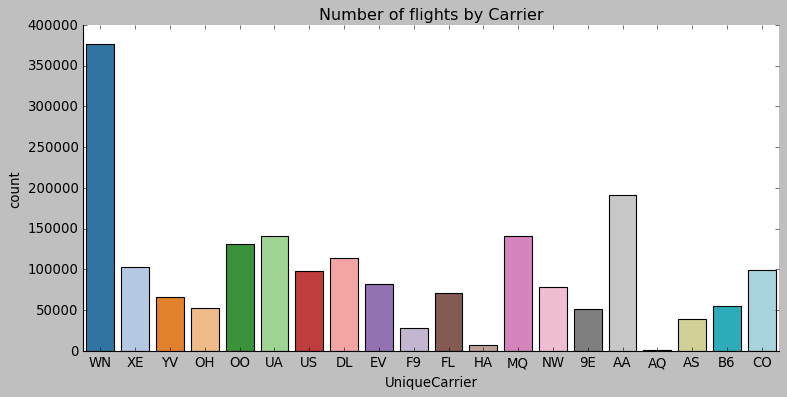

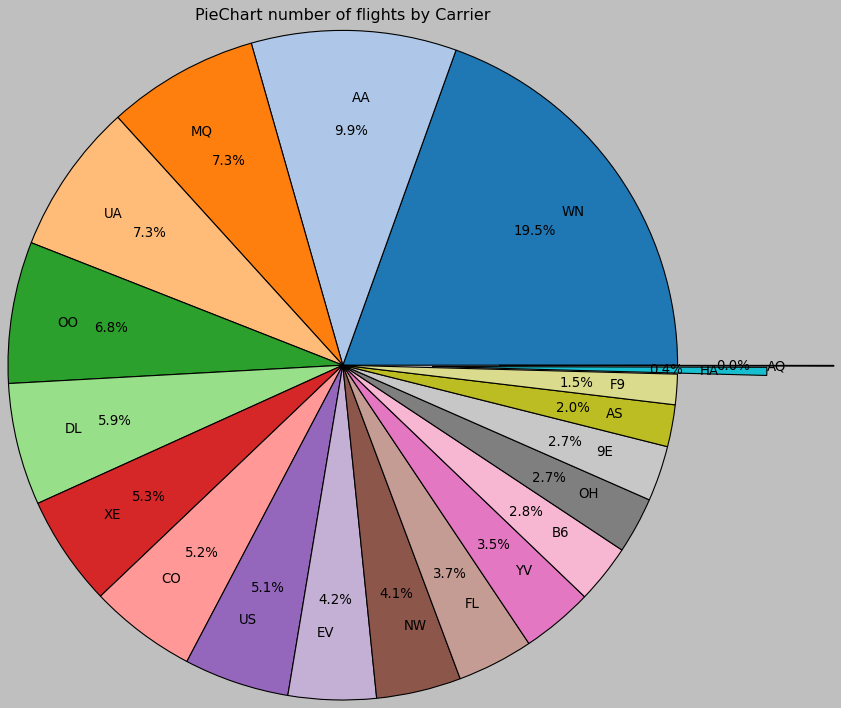

In [3]:
plt.style.use('classic')

cmap = plt.get_cmap('tab20')

g = sns.catplot(data = df, x = 'UniqueCarrier', kind = 'count', height = 5, aspect = 2, palette = cmap.colors)
g.ax.set_title('Number of flights by Carrier')
g.savefig('1cat.png')

flightsByCarrier = df['UniqueCarrier'].value_counts() #This returns a sorted series by values
labels = flightsByCarrier.index #Get a list of labels from a series
explo = [0]*len(labels) #explode to better visualize missrepresented pie charts chunks
explo[-2:] = [.4, .7] #distance of explode


fig, ax = plt.subplots(figsize=(9,15))

ax.pie(flightsByCarrier, labels = labels, autopct='%1.1f%%', 
        explode = explo, labeldistance = 0.8, pctdistance=0.7, 
        rotatelabels = False, radius=1.5, colors = cmap.colors)
ax.set_title('PieChart number of flights by Carrier', color = 'black', pad = 60, ha = 'center')
fig.savefig('pie.png', bbox_inches = 'tight')

### Plot a numerical column
'ArrDelay' in my case was replaced with 'DelayedMinutes' after some transformations, but indicates the same. The maximum delay is approximately of 2400 minutes, but we have very few flights with this delay.

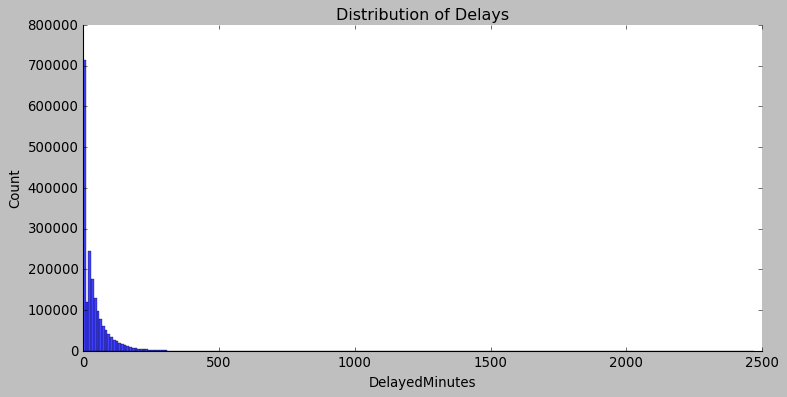

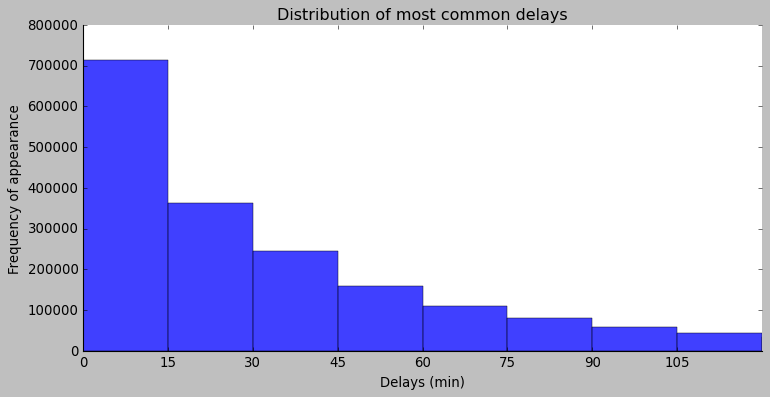

In [4]:
g = sns.displot(df, x = 'DelayedMinutes', binwidth = 10, height = 5, aspect = 2) #simple plot
g.ax.set_title('Distribution of Delays')
g.savefig('1num.png')

f = sns.displot(df, x = 'DelayedMinutes', binwidth = 15, height = 5, aspect = 2)
f.set(xlim = (0,120), xticks = (range(0,120,15))) # also works with ylim and yticks
f.set_axis_labels('Delays (min)','Frequency of appearance') #sets labels on axis
f.ax.set_title('Distribution of most common delays')
f.savefig('1numNoTails.png')

### A numeric and a categorical variables (ArrDelay i UniqueCarrier)

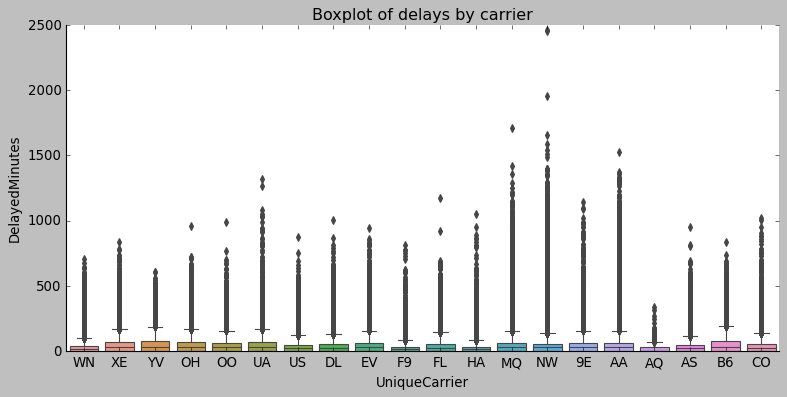

In [5]:
delayCarrierPlot = sns.catplot(kind = 'box', data = df, x = 'UniqueCarrier', y = 'DelayedMinutes', height = 5, aspect = 2)
delayCarrierPlot.ax.set_title('Boxplot of delays by carrier')
delayCarrierPlot.savefig('1num1catBoxPlot.png')

It's the same problem, we lose track of the interesting bit of data due to long tails. Let's zoom in for delays up to 4 hours.

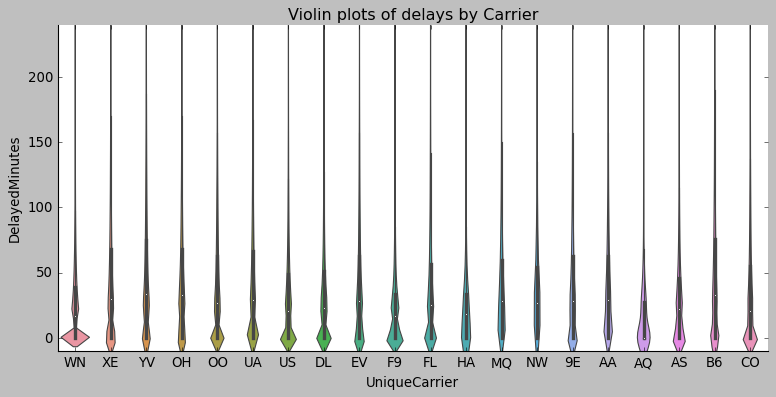

In [6]:
companyDelays = sns.catplot(kind = 'violin', data = df, x = 'UniqueCarrier', y = 'DelayedMinutes', height = 5, aspect = 2)
companyDelays.set( ylim = (-10,240)) # Due to high density at low numbers, the density estimates also negative values
companyDelays.ax.set_title('Violin plots of delays by Carrier')
companyDelays.savefig('1num1catViolin.png')

However, when exploring the mean values, they seem to be greater than the median ( The line at the center of the boxplot). Let's explore each distribution density, with the tails manually shortened. Each density distribution will be normalized for the area under the curve of each carrier to sum one, for a better visualization.

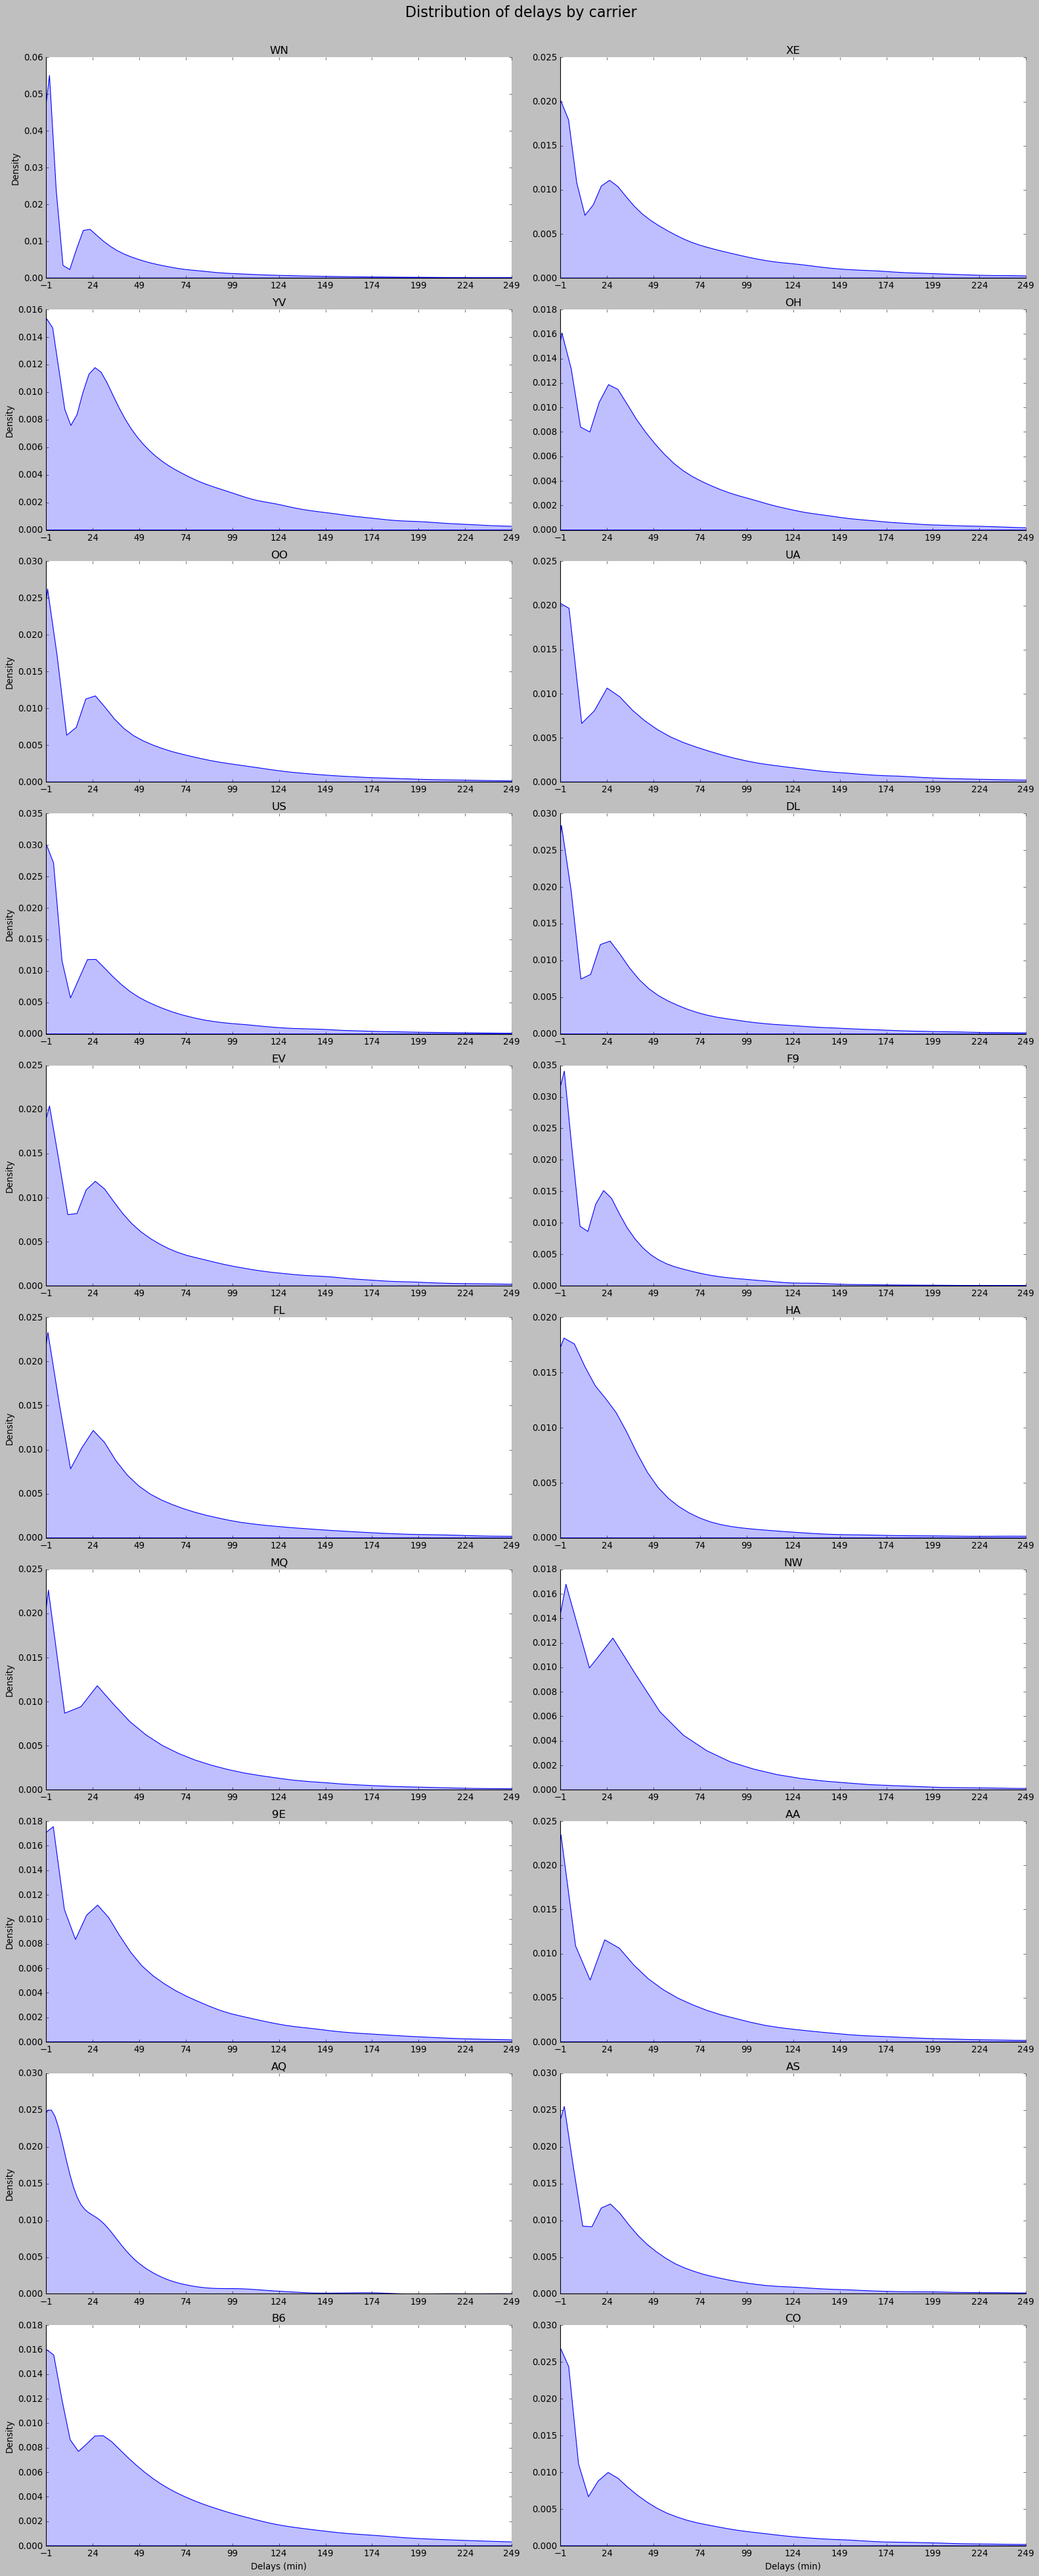

In [7]:
delaysByCompany = sns.displot(df, kind = 'kde', x = 'DelayedMinutes', col = 'UniqueCarrier', 
                              col_wrap =2, height = 5, aspect = 2, fill = True, common_norm = False, 
                              facet_kws = dict(sharey=False, sharex = False))
delaysByCompany.set(xlim = (0, 240), xticks = (range(-1, 250, 25)))
delaysByCompany.set_axis_labels('Delays (min)')
delaysByCompany.set_titles('{col_name}', size = 15)
delaysByCompany.fig.suptitle('Distribution of delays by carrier', size = 20)
delaysByCompany.fig.subplots_adjust(top = 0.96)
delaysByCompany.savefig('1num1catKdeGrid.png')

The insight of these plots is that each one of the carriers has a bimodal Paretto-like distribution of delays, with extremely long tails, so the median and the mean cannot be similar, meaning the boxplot may be misleading: the data density is higher inside the box, more or less around the median, but this is not representative of the probability of the delay in the flight because it is not a gaussian (normal) probability distribution.

### Two numerical variables (DelayedMinutes and CarrierDelay)
There are two approaches here:
Plot the distribution for both variables (histogram, density...)
Plot one variable versus the other (scatter, scatter with marginals, 2-d density...)
That would depend on what we are aiming to show:
- __Distribution plots__ : How the data is distributed. The con is that the chosen variables can span through different value ranges, resulting in poor visualization.
- __Versus plots__: If the variables do not have a correlation it will just result in a cloud of points.

Let us explore both.

#### Distribution plots
To show both data sets together with displot, we have to give up several seaborn features, such as hue or col.

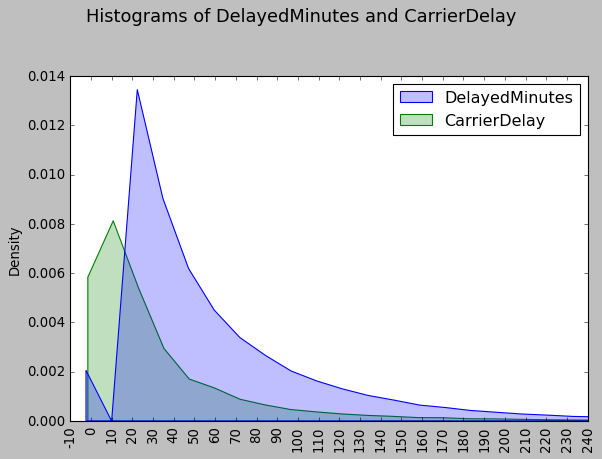

In [8]:
fig, ax = plt.subplots()

sns.kdeplot(data = df[['DelayedMinutes', 'CarrierDelay']], bw_adjust=.25, fill = True,
                      common_norm = False, ax = ax)
ax.set_xlim(-10,240)
ax.set_xticks(range(-10,250,10))
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
fig.suptitle('Histograms of DelayedMinutes and CarrierDelay', fontsize = 16)
fig.tight_layout(pad = 2)
fig.savefig('2numKde.png')

We have to take into account that this is a density distribution, meaning we might get values below 0 even though we have no negative delays.

#### Relational plots

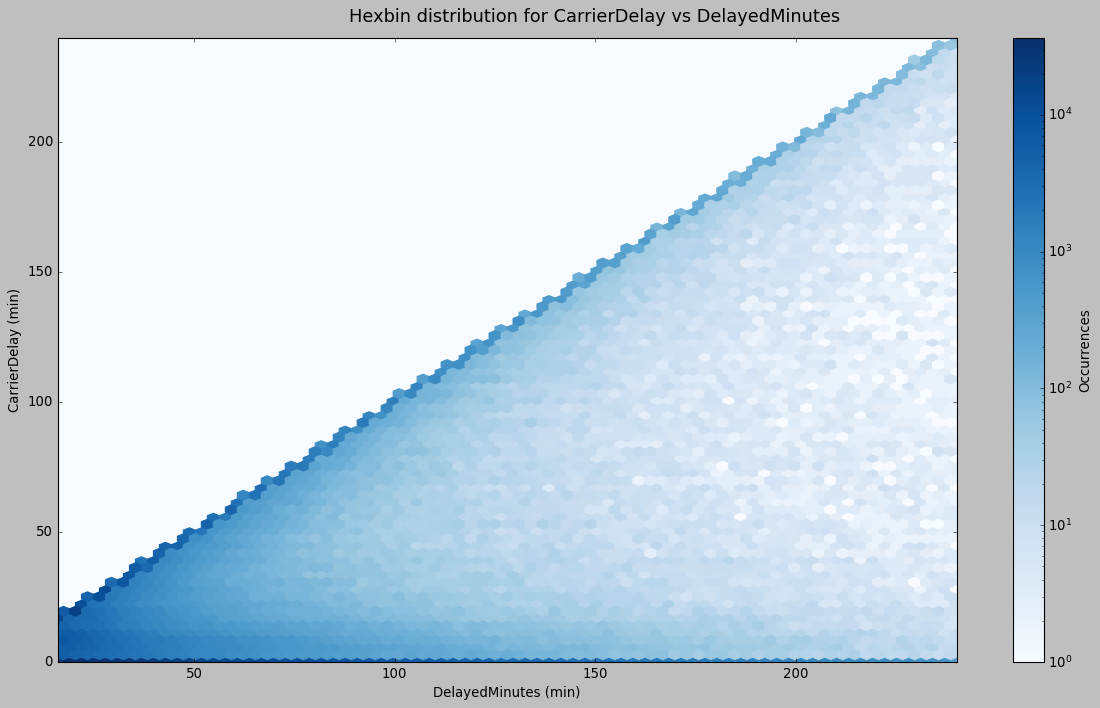

In [9]:
bivariate = df[['DelayedMinutes', 'CarrierDelay']].copy()

#values of DelayedMinutes greater than 240 will not be shown for better visualization
bivariate.drop(bivariate[(bivariate['DelayedMinutes'] > 240) | (bivariate['DelayedMinutes'] < 15)].index, inplace = True) 

fig, ax = plt.subplots(figsize = (15,9))
hb = ax.hexbin(bivariate['DelayedMinutes'], bivariate['CarrierDelay'], gridsize = 75, 
              bins = 'log', cmap = 'Blues')

ax.set_ylabel('CarrierDelay (min)')
ax.set_xlabel('DelayedMinutes (min)')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Occurrences')
fig.suptitle('Hexbin distribution for CarrierDelay vs DelayedMinutes', size=16)
fig.tight_layout(pad = 1)
fig.savefig('2numHexbin.png')

The first thing to notice is that in this graph the flights with 0 delay have been removed. This, along with the colorbar scale being logarithmic, allows a better visualization of the data. Even though we have plenty of flights with actual delay spread through a range between 15 minutes and 240 minutes for this graph, we have about the same number of flights with 0 delay, which saturates the graph at the origin.  
This plot, shows that there is a high probability that either CarrierDelay accounts for the full delay or doesn't contribute at all.

#### Visualize 3 variables (DelayedMinutes, UniqueCarrier and CarrierDelay)
Just by passing the argument col to the previous visualization, we can visualize the relationship between total delay and carrier delay for each carrier

In [10]:
#Defining my on function to pass to the FacetGrid object. Found in documentation.
#Unfortunately, the matlab implementation is used here, since we cannot easily acces the axes of each subplot.
def hexplot(x, y, color, **kwargs):
    #Choose a cmap. If the argument is not named color, a line with kwargs.pop('color', None) should be typed
    cmap = sns.light_palette(color, as_cmap=True)
    #Accept the appropiate kwargs for a matplotlib.pyplot.hexbin() function
    plt.hexbin(x,y, cmap = cmap, gridsize = 50, **kwargs)
    #show the colorbar
    cb = plt.colorbar()
    cb.set_label('Occurrence')

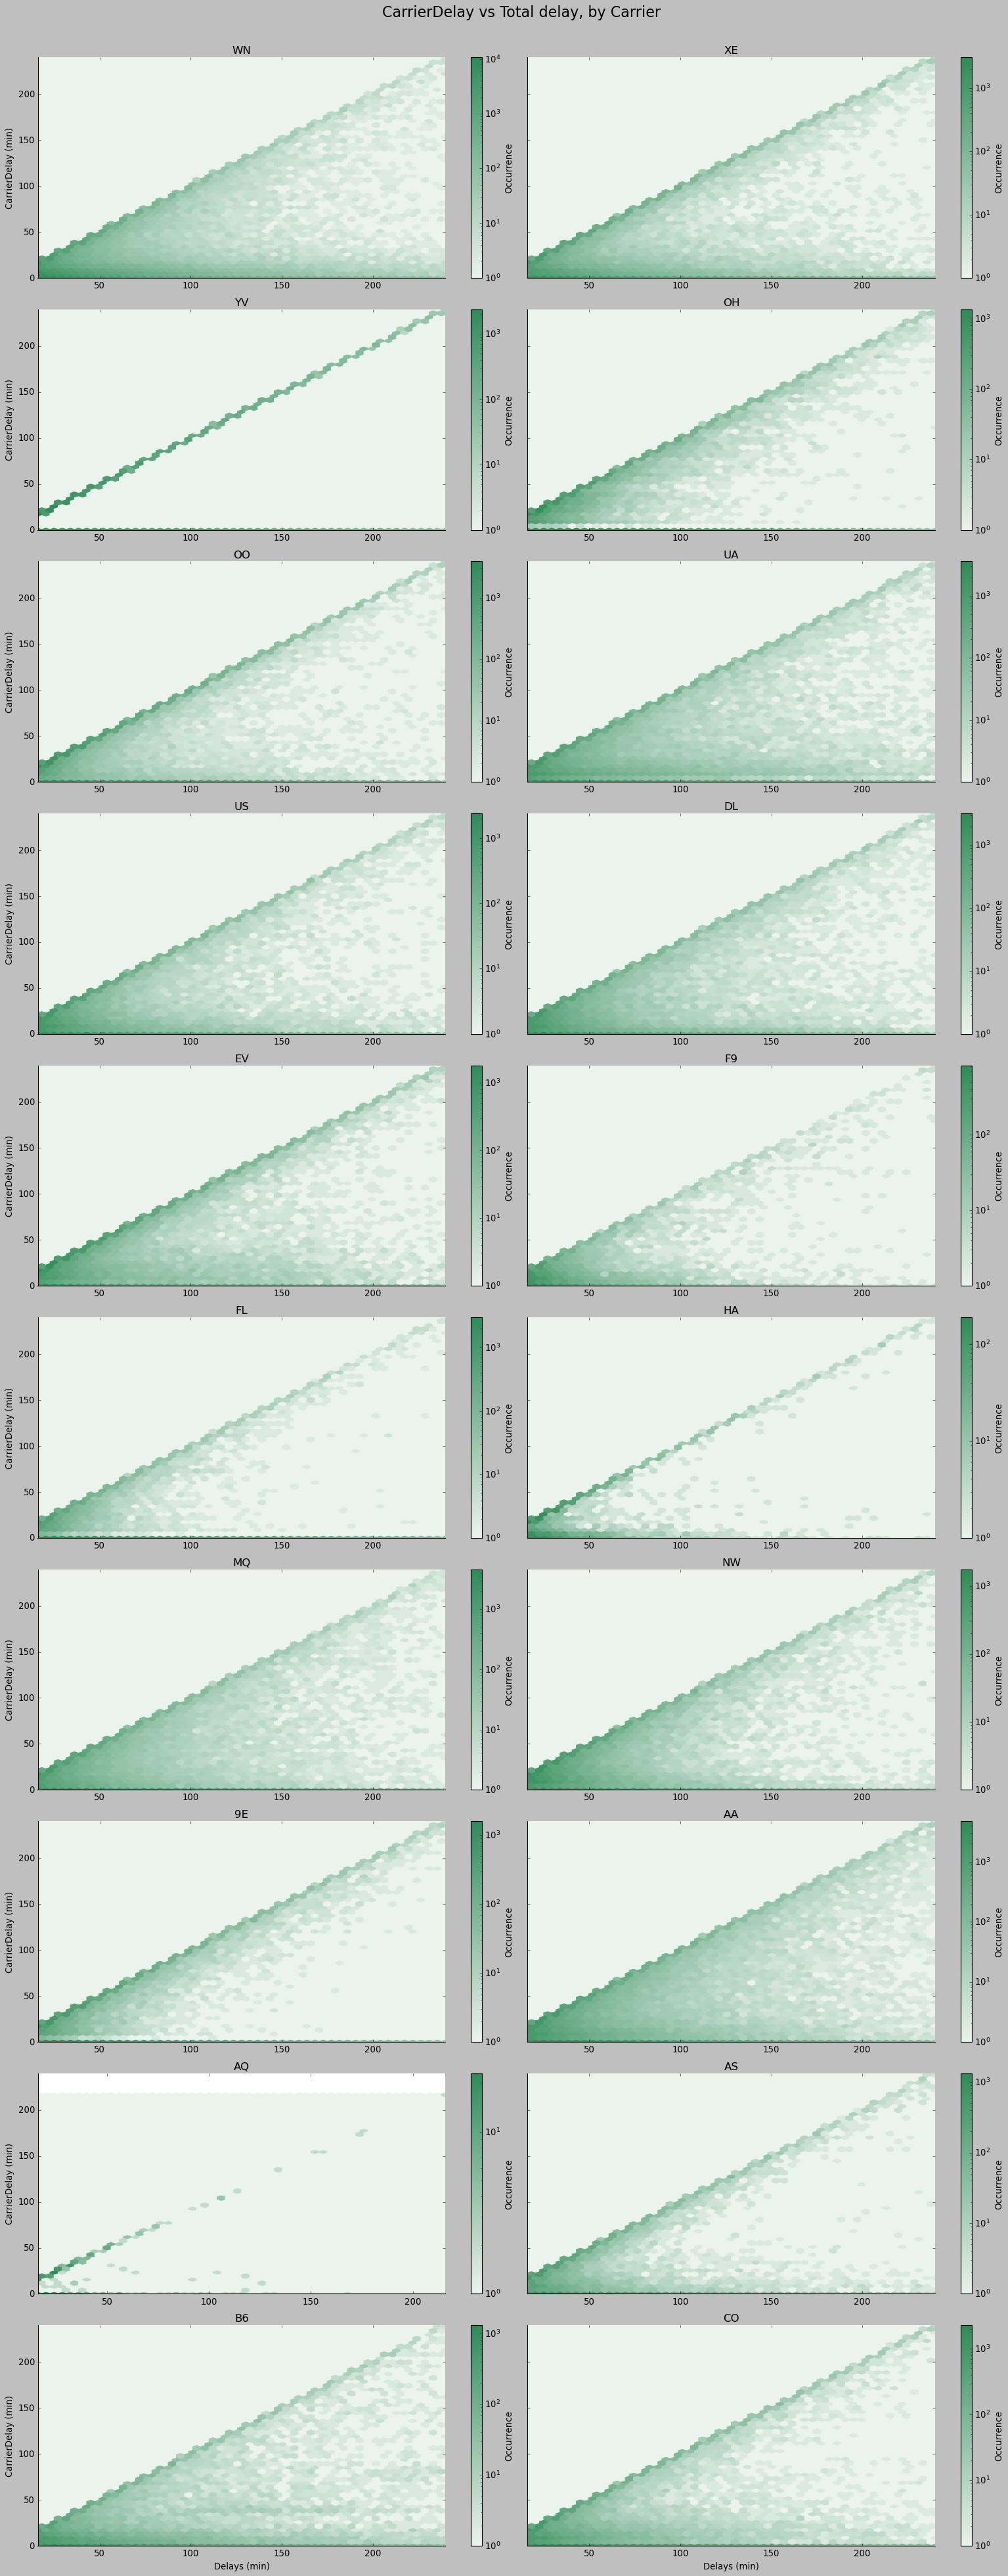

In [11]:
#make de data lighter. Cutting the tail
trivariate = df[['DelayedMinutes', 'CarrierDelay', 'UniqueCarrier']].copy()
trivariate.drop( trivariate[ (trivariate['DelayedMinutes'] > 240) | (trivariate['DelayedMinutes'] < 15) ].index, inplace = True)

#Initialize a FacetGrid object. Specify the layout and aspect. This replaces the plt.subplots() call
hm = sns.FacetGrid(trivariate, col = 'UniqueCarrier', col_wrap = 2, height = 5, aspect = 2, sharex = False)

#Now we have an array of empty subplots. To fill them, we use the map higher order function, with our defined function hexplot.
hm.map(hexplot, 'DelayedMinutes', 'CarrierDelay', color = 'seagreen', bins = 'log', edgecolors = 'face')
#The plt.hexbin function accepts many arguments. We have put the essential as mandatory parameters (labels when passed through
#a mapped FacetGrid object magically convert to series. I don't think i completely understand the process here but anyway), and the
#rest #as kwargs, which are optional.

#Final arrangements.
hm.fig.suptitle('CarrierDelay vs Total delay, by Carrier', size = 20)
hm.fig.subplots_adjust(top = 0.96)
hm.set_axis_labels('Delays (min)', 'CarrierDelay (min)')
hm.set_titles('{col_name}', size = 15) #This '{col_name}' is also a FacetGrid object feature
hm.savefig('2num1catHexbinGrid.png')

Note that for every carrier a different colorbar scale is used for a better visualization. This image concurs with the previous plot CarrierDelay vs DelayedMinutes, showing carrierDelay as either the only cause of Delay, or not a cause at all.

#### More than 3 variables (DelayedMinutes, UniqueCarrier, CarrierDelay, LateAircraftDelay, NASDelay)
For this part let us show different causes for the delay. Note that no tails are dropped, since they do not affect visualization. This decision may be controversial.

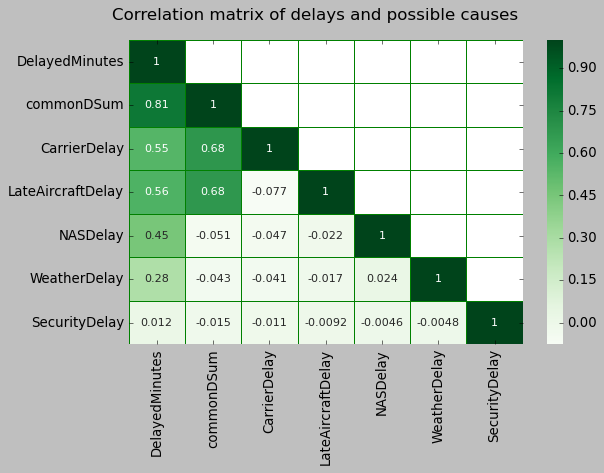

In [12]:
df['commonDSum'] = df['CarrierDelay'] + df['LateAircraftDelay'] #Addittion of 2 top causes for delay.
corrMat = df[['DelayedMinutes','commonDSum','CarrierDelay', 
              'LateAircraftDelay', 'NASDelay', 'WeatherDelay', 'SecurityDelay']].corr()

#Create a mask. Where true or != 0, it will mask the results
mask = np.triu(corrMat, 1)

fig, ax = plt.subplots()
#Pass the parameter mask to the heatmap function
cr = sns.heatmap(corrMat, annot = True, linewidths = 0.5, mask = mask,
            linecolor = 'green', annot_kws={"size": 10}, cmap = 'Greens', ax = ax)

#We can use either cr or axes, since sns.heatmap is a function returning an ax object
fig.suptitle('Correlation matrix of delays and possible causes', size = 15)
fig.tight_layout(pad = 1)
fig.savefig('Correlogram.png')

It is shown that just by adding up 2 out of 5 causes of delay, we have an acceptable correlation coefficient. How about we do it by carrier?
After trying for what seemed an eternity with seaborn FacetGrid and the FacetGrid.map() method, I have decided to go the ax way. Basically, create a figure containing an array of subplots with matplotlib.pyplot, plot inside each subplot with seaborn.heatmap(), which conveniently is an ax level function, then use matplotlib.pyplot AFTERWARDS (otherwise sns.heatmap would likely overwrite the matplotlib.pyplot axes) to add the details.

In [13]:
def annotatedCorrelogramGrid(data, fig, axs, color):
    
    #Create a label for each subplot
    labels = list(data['UniqueCarrier'].unique())
    flatAxs = axs.flatten()
    
    for label in labels:
    
        #Only get the delays realted with a particular carrier
        rows = data[data['UniqueCarrier'] == label]
        ax = flatAxs[labels.index(label)]

        corrMat = rows[['DelayedMinutes','commonDSum','CarrierDelay', 
                  'LateAircraftDelay', 'NASDelay', 'WeatherDelay', 'SecurityDelay']].corr()
        #Mask, to only show the lower triangle of the correlation matrix
        mask = np.triu(corrMat, 1)
        
        #Actually plot. Heatmap with annotations.
        heatPlot = sns.heatmap(corrMat, annot = True, linewidths = 0.5, mask = mask,
                    linecolor = 'green', annot_kws={"size": 10}, cmap = color, ax = ax)
        
        heatPlot.set_title(label)   

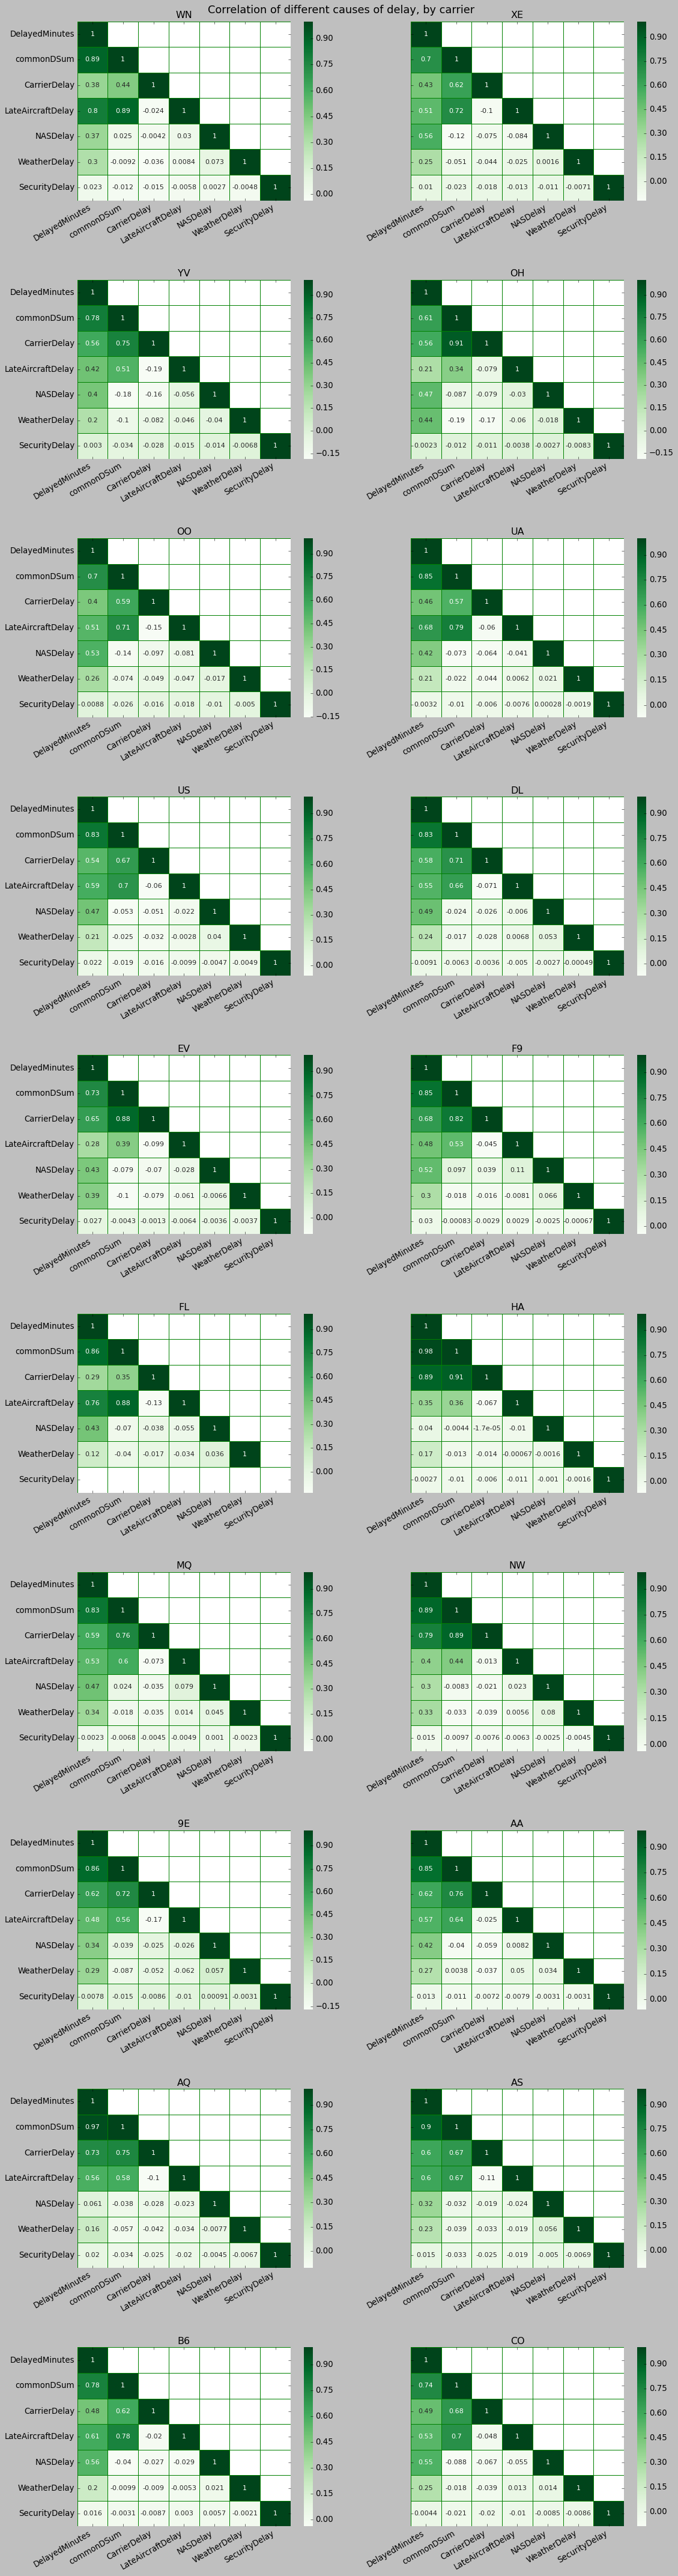

In [14]:
data = df[['UniqueCarrier','DelayedMinutes','commonDSum','CarrierDelay', 
              'LateAircraftDelay', 'NASDelay', 'WeatherDelay', 'SecurityDelay']].copy()

#Generate subplots array. We are going to work with fig, and let seaborn.heatmap handle the axs (it is a matplotlib.ax
#based function). After plotting, with the help of matplotlib, the final touch will be delivered.
fig, axs = plt.subplots(10,2, sharey = True, figsize = (15,55)) 

#With the above code we have created a grid of subplots. Let's fill it one by one.
annotatedCorrelogramGrid(data, fig, axs, 'Greens')
#Rotate the labels on xticks. The typical rotation dislocates the labels, and rotation_mode = 'anchor'
#Crops them with the plot
fig.autofmt_xdate()
fig.suptitle('Correlation of different causes of delay, by carrier', size = 16)
#Pad as an argument for tight_layout allows to control separation between subplots
fig.tight_layout(pad=3)
fig.savefig('CorrelogramGrid.png')    

With this visualization, we can conclude that delays vary in cause depending on the carrier. Maybe if we added NASDelay (3rd highest correlation coeficient with DelayedMinutes) to the commonDSum we may see that delays are mostly due to these 3 causes carrier wide. On the other hand, that may not be the case. Further analysis should be conducted.

Note that for the carrier FL, there appears a blank space in securityDelay. This may be due to an error while plottig, or due to the fact that all of the security delays related with the company are 0. Let us check.

In [15]:
#Just the rows with UniqueCarrier == FL
dataFL = data[data['UniqueCarrier'] == 'FL'].copy()
#print the sum of securityDelay values
print(dataFL['SecurityDelay'].sum())

0.0


It is surprising to see how some Carriers still can deliver snipets of information through unexpected ways.

#### RidgePlots
This exercise could not be concluded without the ridge plots of the delays for each carrier. To avoid bloating the plot and to save cpu power, we are going to plot only 4 variables: CarrierDelay, LateAircraftDelay, DelayedMinutes and commonDsum (the addittion of the 2 most frequent causes of delay CarrierDelay and LateAircraftDelay).

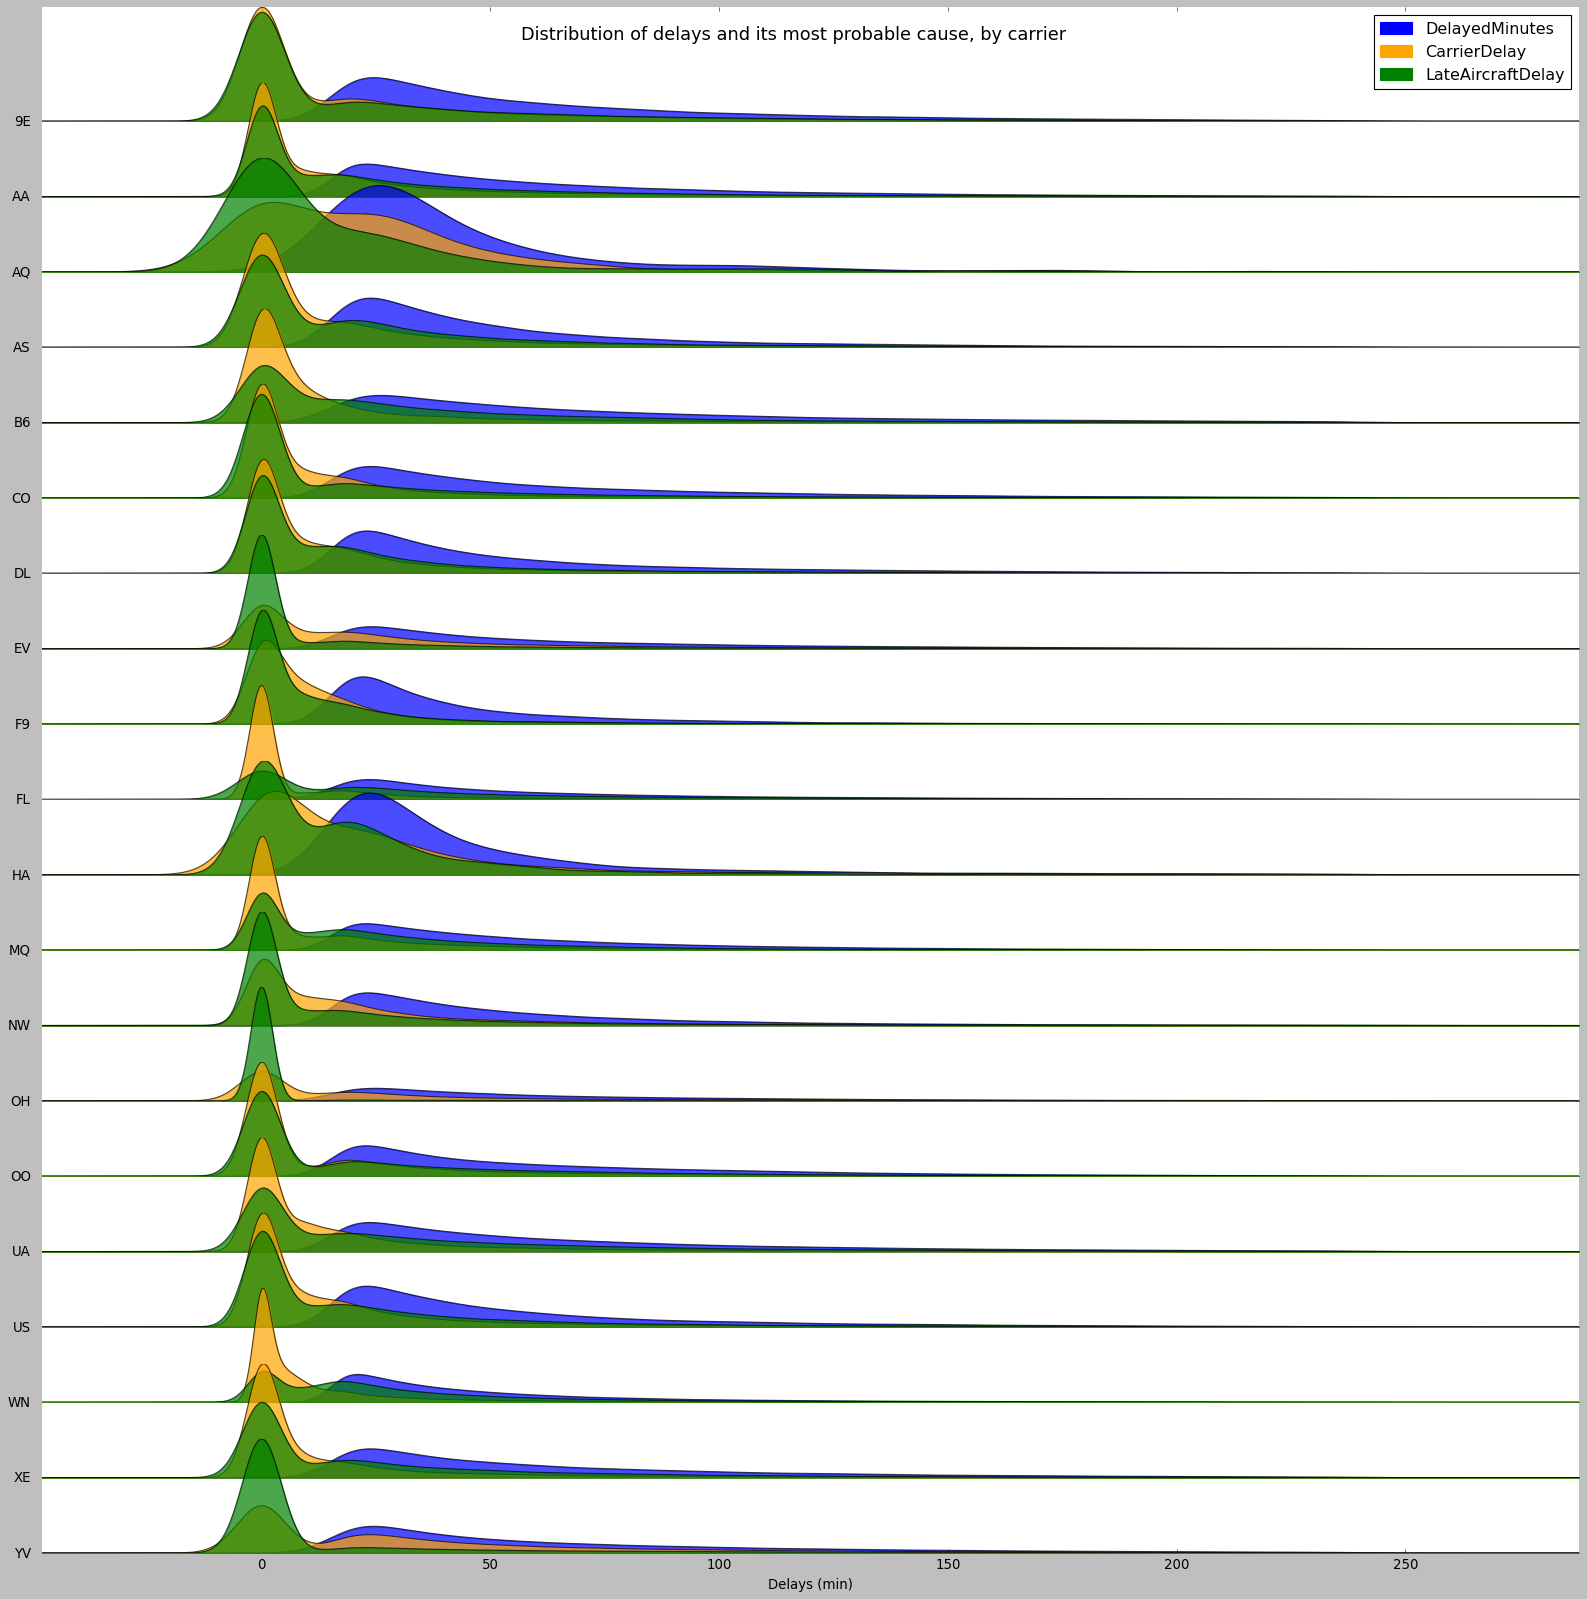

In [25]:
fig, axs= joypy.joyplot(data.drop(data[(data['DelayedMinutes'] > 240) | (data['DelayedMinutes'] < 15)].index), 
                         by = 'UniqueCarrier', column = ['DelayedMinutes', 'CarrierDelay','LateAircraftDelay'], ylim = 'own', 
                         figsize=(20,20), alpha = 0.7, legend = True, color = ['blue', 'orange', 'green'], common_norm = False)

axs[-1].set_xlabel('Delays (min)')
fig.suptitle('Distribution of delays and its most probable cause, by carrier', size = 16)
fig.savefig('RidgePlot.png')